# How to get 'GOOD RATING' on Google play store

 <img src="Google_Play-Logo.png" alt="Drawing" style="width: 300px; height: 200px"/>

In this Karnel we are given with data of Apps which are present of Google Play Store.

And we are doing Exploratory Data Analysis on thsi available data.

### Importing Required Libraries

In [1]:
import numpy as np #for linear Algebra

import pandas as pd #for data pre-Processing

import matplotlib.pyplot as plt #for plotting various Graphs

import seaborn as sns #for ploting interactive graphs

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

--------------------------------------------------------------------------------------------------

### Importing Data from CSV

In [2]:
df = pd.read_csv('googleplaystore.csv')
#df.head()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


-------------------------------------------------------------------------------------------------------------------------------

### Data Exploration

In [3]:
print('Data Consists of total ' + str(df.size)+ ' Objects')

Data Consists of total 140933 Objects


In [4]:
print('Data is having '+ str(df.shape[0])+' Rows and ' + str(df.shape[1])+ ' Columns')

Data is having 10841 Rows and 13 Columns


**Name of all Columns present in data**

In [5]:
print('Given CSV Contains these Columns : ')
df.columns

Given CSV Contains these Columns : 


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**DataTypes of Columns**

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Data Clean up and Missing Values Treatment

**Data Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Missing Data**

In [8]:
total_missing =  df.isnull().sum().sort_values(ascending = False)
percent_missing = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys=['No. of Missing Values', 'Missing Values(in %)'])
print('Following Table shows the number of missing values in each Column :-')
missing_data.head()

Following Table shows the number of missing values in each Column :-


,No. of Missing Values,Missing Values(in %)
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224


**Droping Null Values**

In [9]:
df.dropna(how = 'any', inplace = True)

**Rechecking Null Values**

In [10]:
total_missing =  df.isnull().sum().sort_values(ascending = False)
percent_missing = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys=['No. of Missing Values', 'Missing Values(in %)'])
print('Following Table shows the number of missing values in each Column :-')
missing_data.head()

Following Table shows the number of missing values in each Column :-


,No. of Missing Values,Missing Values(in %)
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0


**Yes, we have succesfully cleaned Data No Null Values Present !**

In [11]:
print('Shape of Data After Cleaning is : ' + str(df.shape))

Shape of Data After Cleaning is : (9360, 13)


**Conclusion :**

    

###### Initially there were 10841 Rows with 13 Fields and now after cleaning we are having 9360 Rows left with 13 Fields

### Correcting Data Types

In [12]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

**We Do not want  '$'  Sign, So we will remove that**

In [13]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [14]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

**We don't want that '+' sign after value nor we need ',' in values, So we will remove those**

In [15]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

I encode it by order of size;

ex: 

0 refer to 1+

1 refer to 5+
    
2 refer  to 10+
    .
    .
    .

### Discussion on Ratings

In [16]:
df['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

**rcParam Distribution**

Text(0.5, 1.0, 'Distribution of Rating')

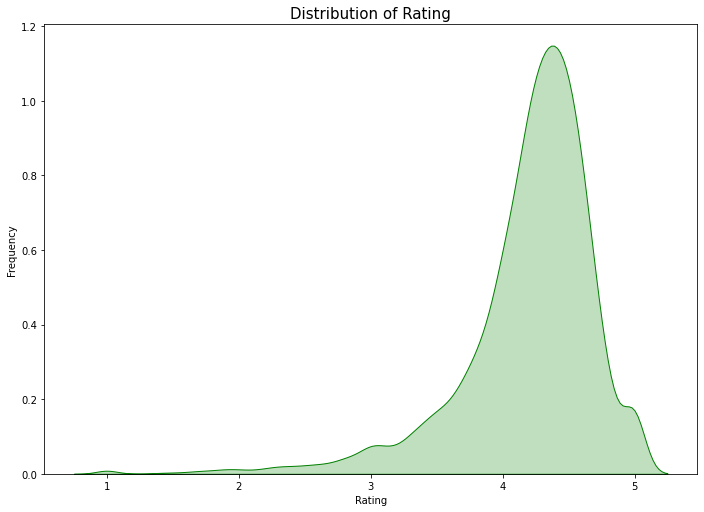

In [17]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Rating, color="Green", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 15)

**Conclusion from this:**
        
       

######  From above figure we can conclude that the average rating is around 4.

### Discussion on Categories

In [18]:
print('In this App rating data we are having ' + str(len(df['Category'].unique())) + ' Categories and those are listed below')

print('\n',  df['Category'].unique())

In this App rating data we are having 33 Categories and those are listed below

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

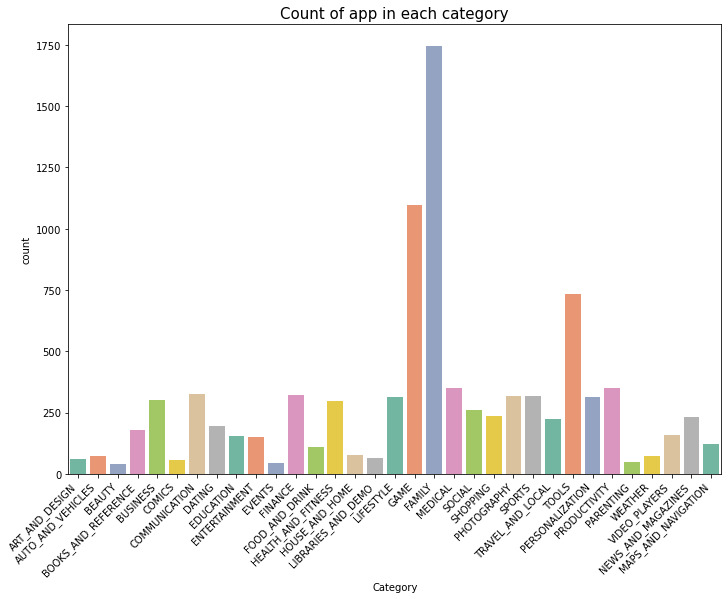

In [19]:
g = sns.countplot(x="Category",data=df, palette = "Set2")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g 
plt.title('Count of app in each category',size = 15)

**We can clearly observe that 'FAMILY' followed by 'GAMES' are the most appeared in Apps Stores**

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

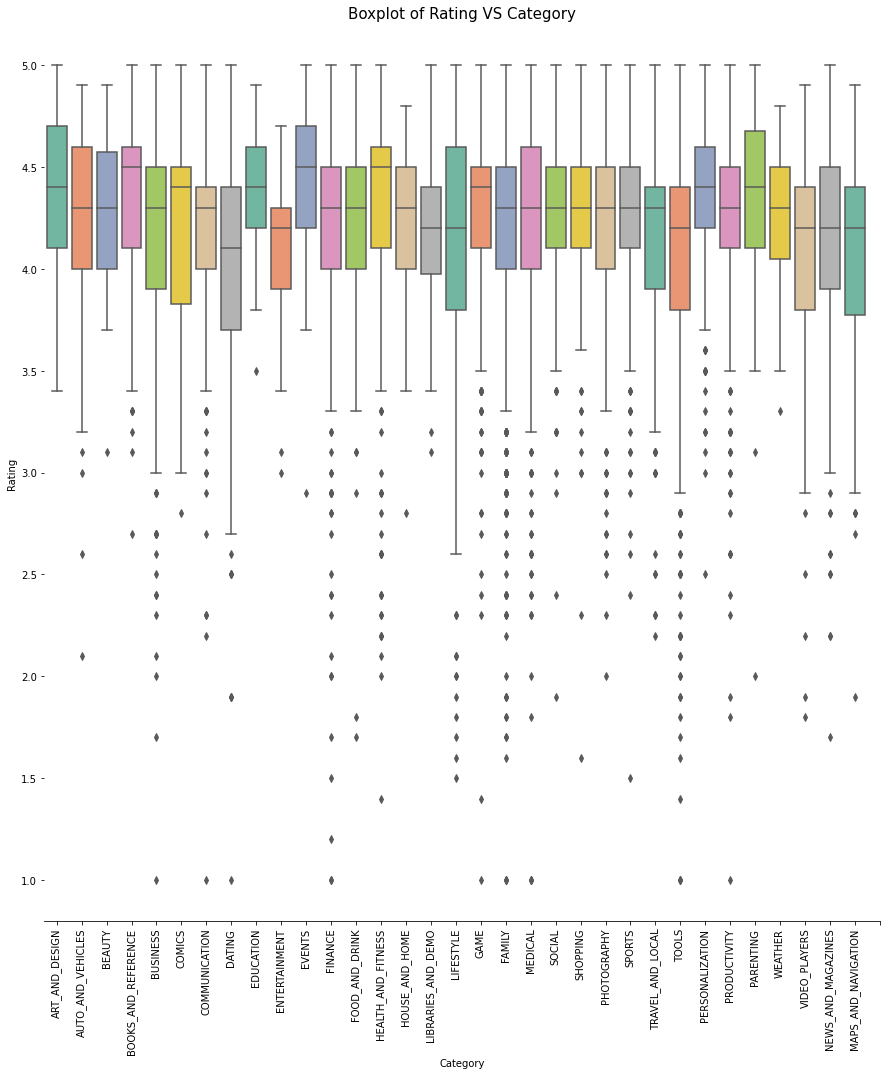

In [20]:
g = sns.catplot(x = 'Category', y='Rating', data = df, kind = 'box', height =13 , palette = 'Set2')
g.despine(left = True)
g.set_xticklabels(rotation = 90)
g.set(xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 15)

**Ratings for Each category is not that much Different**

### Discussion on Reviews

In [21]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

**If you carely observe the Data Type is still Object so we need to convert it to int**

In [22]:
# convert to int

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

**Rating distibution** 

Text(0.5, 1.0, 'Distribution of Reveiw')

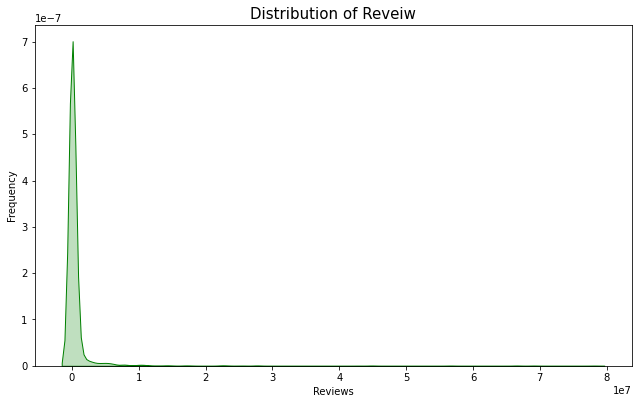

In [23]:
rcParams['figure.figsize'] = 10.7,6.27
g = sns.kdeplot(df.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 15)

In [24]:
int(df['Reviews'].mean())

514376

In [25]:
print('Number of apps that Received more than average Review are '+ str(df[df.Reviews > 514376].count().unique()))

Number of apps that Received more than average Review are [1017]


In [26]:
df[df.Reviews > 514376].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,1.000000e+08,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
142,Wikipedia,BOOKS_AND_REFERENCE,4.4,577550,Varies with device,1.000000e+07,Free,0.0,Everyone,Books & Reference,"August 2, 2018",Varies with device,Varies with device
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,1.000000e+08,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,5.000000e+07,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device


**Total 1017 Apps are having Reviews more than Average number of Reviews**

In [27]:
str(df[df.Reviews > 1000000].count().unique())

'[704]'

In [28]:
print('Number of apps having more than 1M reviews : ' + str(df[df.Reviews > 1000000].count().unique()))

Number of apps having more than 1M reviews : [704]


<Figure size 720x720 with 0 Axes>

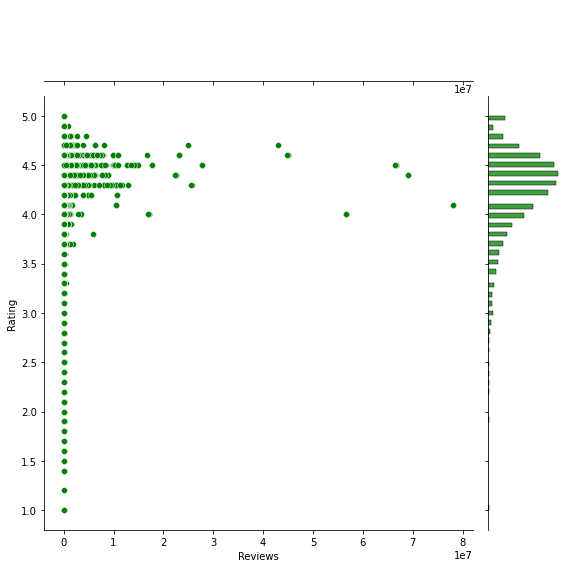

In [29]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'Green', data=df,size = 8);

Text(0.5, 1.0, 'Rating VS Reveiws')

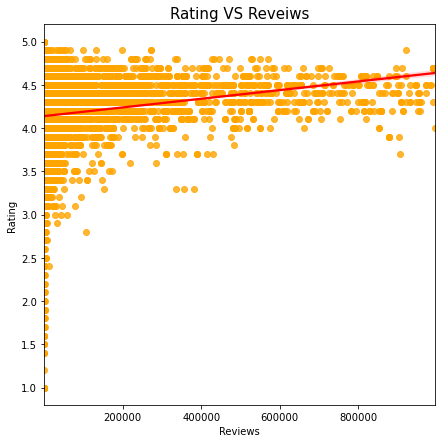

In [30]:
plt.figure(figsize = (7,7))
sns.regplot(x="Reviews", y="Rating", scatter_kws = {'color':'orange'}, line_kws={'color':'Red'},data=df[df['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 15)

**What we can observe here is that Apps that are more popular are having good Ratings**

### Discussion on Size of Apps

In [31]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [32]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

**Data Present here is still in Object Data Type and is consisting of Metric sign and one unique value that is 'Varies with device'**

**Let's Solve this**

In [33]:
# we are replcing 'Varies with device' with NaN value

df['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [34]:
df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

**Now we will Replace Nan with mean of Sizes in each Category**

In [35]:
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

<Figure size 720x720 with 0 Axes>

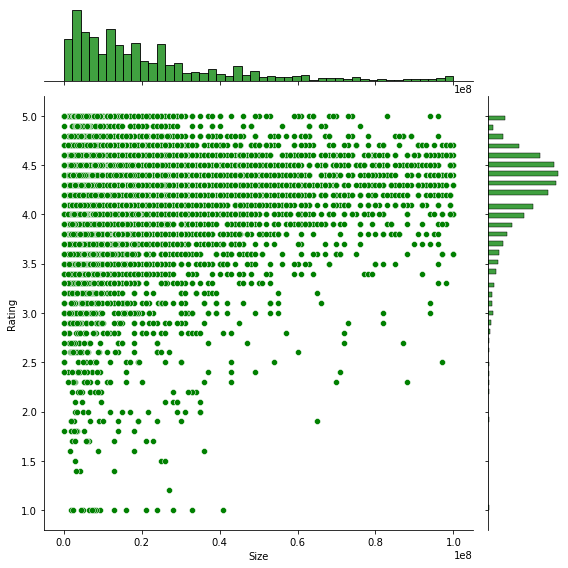

In [36]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'Green', data=df,size = 8);


### Discussion on App Installs

In [37]:
df['Installs'].head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [38]:
sorted_values = sorted(list(df['Installs'].unique()))
sorted_values

[1.0,
 5.0,
 10.0,
 50.0,
 100.0,
 500.0,
 1000.0,
 5000.0,
 10000.0,
 50000.0,
 100000.0,
 500000.0,
 1000000.0,
 5000000.0,
 10000000.0,
 50000000.0,
 100000000.0,
 500000000.0,
 1000000000.0]

In [39]:
df['Installs'].replace(sorted_values,range(0,len(sorted_values),1), inplace = True )
sorted(list(df['Installs'].unique()))

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0]

Text(0.5, 1.0, 'Rating VS Installs')

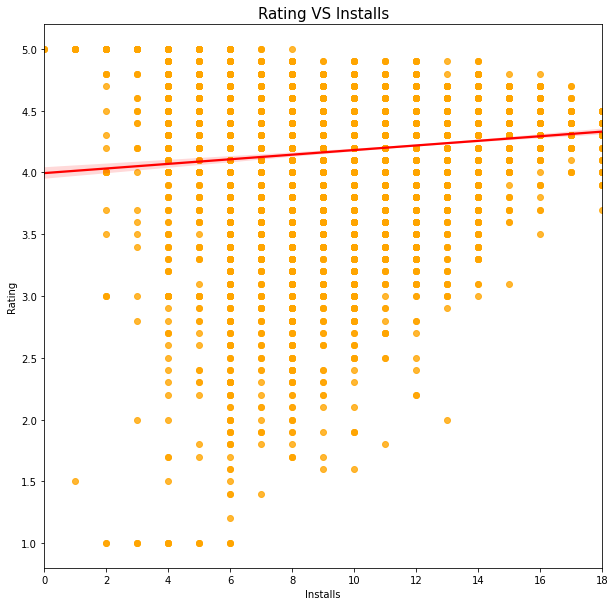

In [40]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", scatter_kws = {'color':'orange'}, line_kws={'color':'Red'},data=df);
plt.title('Rating VS Installs',size = 15)

**We can observe that Number of Installs is affecting Ratings**

### Discussion on Type of Apps

In [41]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [42]:
# Data to plot
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)

print('In Given Data we are having ' + str(sizes[0])+' '+ str(labels[0]) + ' Apps and '+ str(sizes[1])+' ' + str(labels[1])+ ' Apps')


In Given Data we are having 8715 Free Apps and 645 Paid Apps


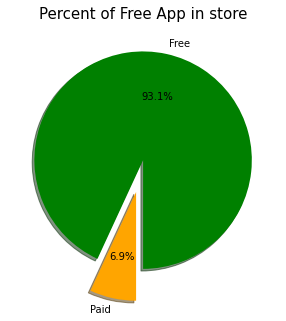

In [43]:
colors = ["Green","orange"]
explode = (0,0.3)  # explode 1st slice
 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 15)
plt.show()

**More than 90 % of Total application are available as FREE**

**Now we Will Focus our Discussion on the 6.9% Paid Applications for that let's do**

### Discussion on Price

In [44]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [45]:
df['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

**From the above Statastical Description of Prices we can conclude that the Average price of 645 App which are paid  is near about $ 1 Only** 

**where as the most Expensive app is for $ 400**

Let's Find out the most Expensive app 

In [46]:
df[df['Price']==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


<img src="trump.png" alt="Drawing" style="width: 400px; height: 200px"/>

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

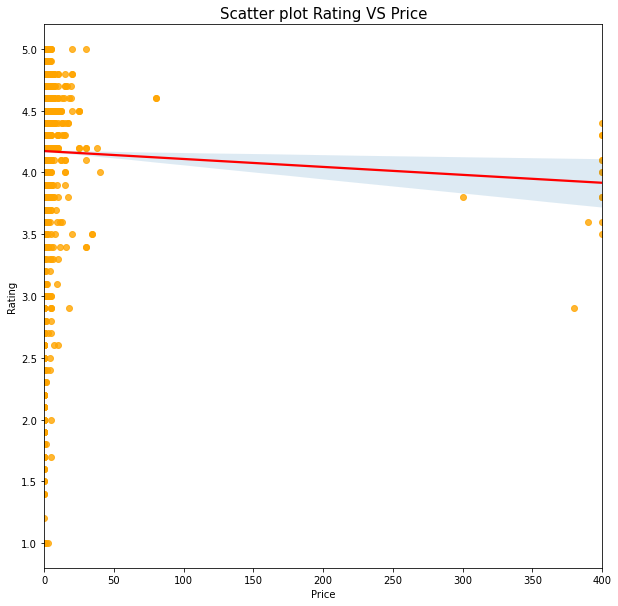

In [47]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", scatter_kws = {'color': 'orange'}, line_kws = {'Color':'red'},data=df[df['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 15)

**We can observe that customers are disappointed with high prices of Apps so the direct affect can be seen on Ratings**

In [48]:
df.loc[ df['Price'] == 0, 'PriceBand'] = ' Free'
df.loc[(df['Price'] > 0) & (df['Price'] <= 0.99), 'PriceBand'] = ' cheap'
df.loc[(df['Price'] > 0.99) & (df['Price'] <= 2.99), 'PriceBand']   = ' not cheap'
df.loc[(df['Price'] > 2.99) & (df['Price'] <= 4.99), 'PriceBand']   = ' normal'
df.loc[(df['Price'] > 4.99) & (df['Price'] <= 14.99), 'PriceBand']   = ' expensive'
df.loc[(df['Price'] > 14.99) & (df['Price'] <= 29.99), 'PriceBand']   = ' Very expensive'
df.loc[(df['Price'] > 29.99), 'PriceBand']  = ' Too expensive'

In [49]:
df[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,Free,4.186288
1,Too expensive,3.923810
2,Very expensive,4.252000
3,cheap,4.300943
4,expensive,4.269149
5,normal,4.250318
6,not cheap,4.292975


Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

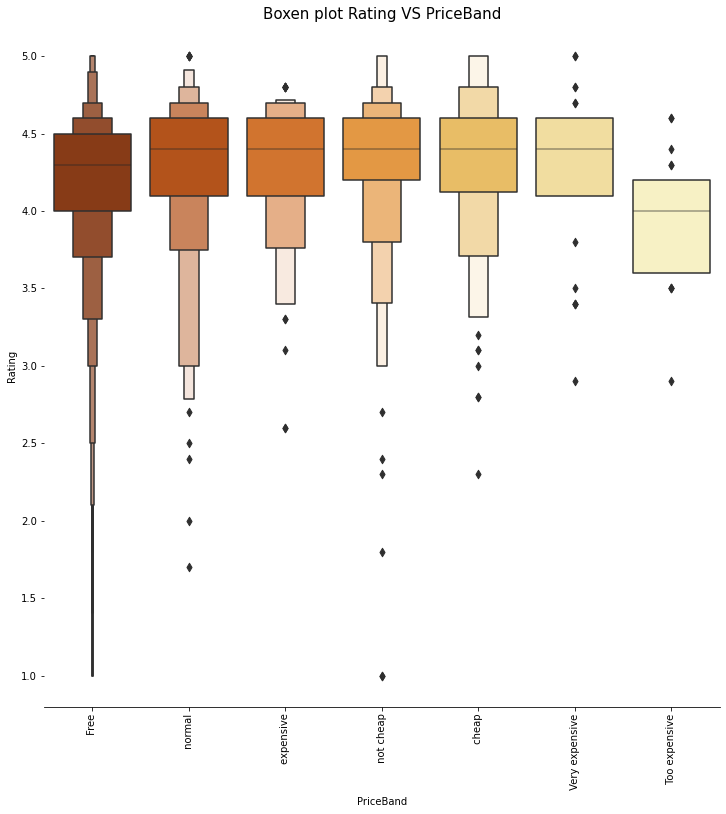

In [50]:
g = sns.catplot(x="PriceBand",y="Rating",data=df, kind="boxen", height = 10 ,palette = "YlOrBr_r")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 15)

**Generaly Price are not affecting ratings that much but if the app is of too Expensive Category then we can observe slight downfall in it.**

### Discussion on Content Rating

In [51]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Boxen plot Rating VS Content Ratings')

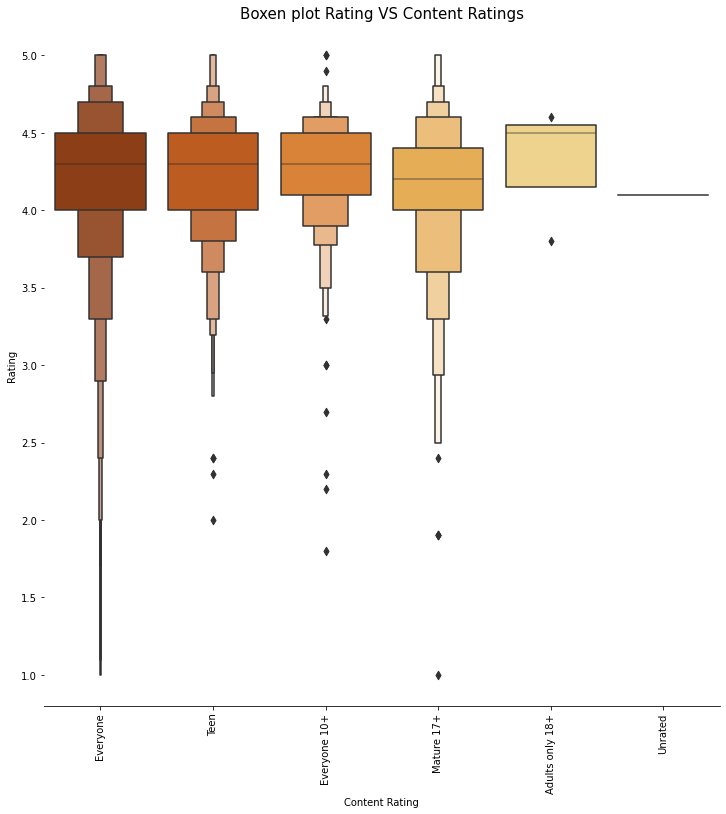

In [52]:
g = sns.catplot(x="Content Rating",y="Rating",data=df, kind="boxen", height = 10 ,palette = "YlOrBr_r")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS Content Ratings',size = 15)

**1. Content Rating (categories) are not affecting ratings that much but for 'Matured + 17' apps we can see downfall in ratings**

**2. We are having only one app which is Unrated**

In [53]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9.0,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,Free


**That Unrated app is : DC Universe Online Map**

**And Intentionaly we are droping this APP**

In [54]:
df = df[df['Content Rating'] != 'Unrated']
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free


In [55]:
df = pd.get_dummies(df, columns= ["Content Rating"])

In [56]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,PriceBand,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8.0,Free,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free,0,1,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11.0,Free,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free,0,1,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13.0,Free,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free,0,1,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15.0,Free,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10.0,Free,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free,0,1,0,0,0


### Discussion on Genres

In [57]:
print( len(df['Genres'].unique()) , "genres")

print("\n", df['Genres'].unique())

115 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

In [58]:
df.Genres.value_counts().head(15)

Tools               731
Entertainment       533
Education           468
Action              358
Productivity        351
Medical             350
Sports              333
Communication       328
Finance             323
Photography         317
Lifestyle           313
Personalization     312
Business            303
Health & Fitness    297
Social              259
Name: Genres, dtype: int64

In [59]:
df.Genres.value_counts().tail(15)

Board;Pretend Play                     1
Adventure;Brain Games                  1
Communication;Creativity               1
Card;Brain Games                       1
Strategy;Education                     1
Lifestyle;Pretend Play                 1
Comics;Creativity                      1
Lifestyle;Education                    1
Travel & Local;Action & Adventure      1
Health & Fitness;Action & Adventure    1
Strategy;Creativity                    1
Entertainment;Education                1
Role Playing;Brain Games               1
Arcade;Pretend Play                    1
Tools;Education                        1
Name: Genres, dtype: int64

**There are many Genres which arehaving single entry.....This may leads to biased result**

In [60]:
df['Genres'] = df['Genres'].str.split(';').str[0]

In [61]:
print( len(df['Genres'].unique()) , "genres")

print("\n", df['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [62]:
df.Genres.value_counts().head()

Tools            732
Entertainment    577
Education        563
Action           375
Productivity     351
Name: Genres, dtype: int64

In [63]:
df.Genres.value_counts().tail()

Casino           37
Trivia           28
Word             28
Music            24
Music & Audio     1
Name: Genres, dtype: int64

*Here Music and Audio is nothing but Music Only*

In [64]:
df['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [65]:
df.Genres.value_counts().tail()

Beauty    42
Casino    37
Trivia    28
Word      28
Music     25
Name: Genres, dtype: int64

In [66]:
df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [67]:
df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)

,Genres,Rating
14,Dating,3.970769


In [68]:
df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

,Genres,Rating
18,Events,4.435556


**Conclusion**

**1. Average Rating Genres wise is 4.21**

**2. Heighest Rating Genres wise is 4.43 which is for EVENTS APPS**

**2. Lowest Rating Genres wise is 3.97 which is for DATING APPS**

Text(0.5, 1.0, 'Boxenplot of Rating VS Genres')

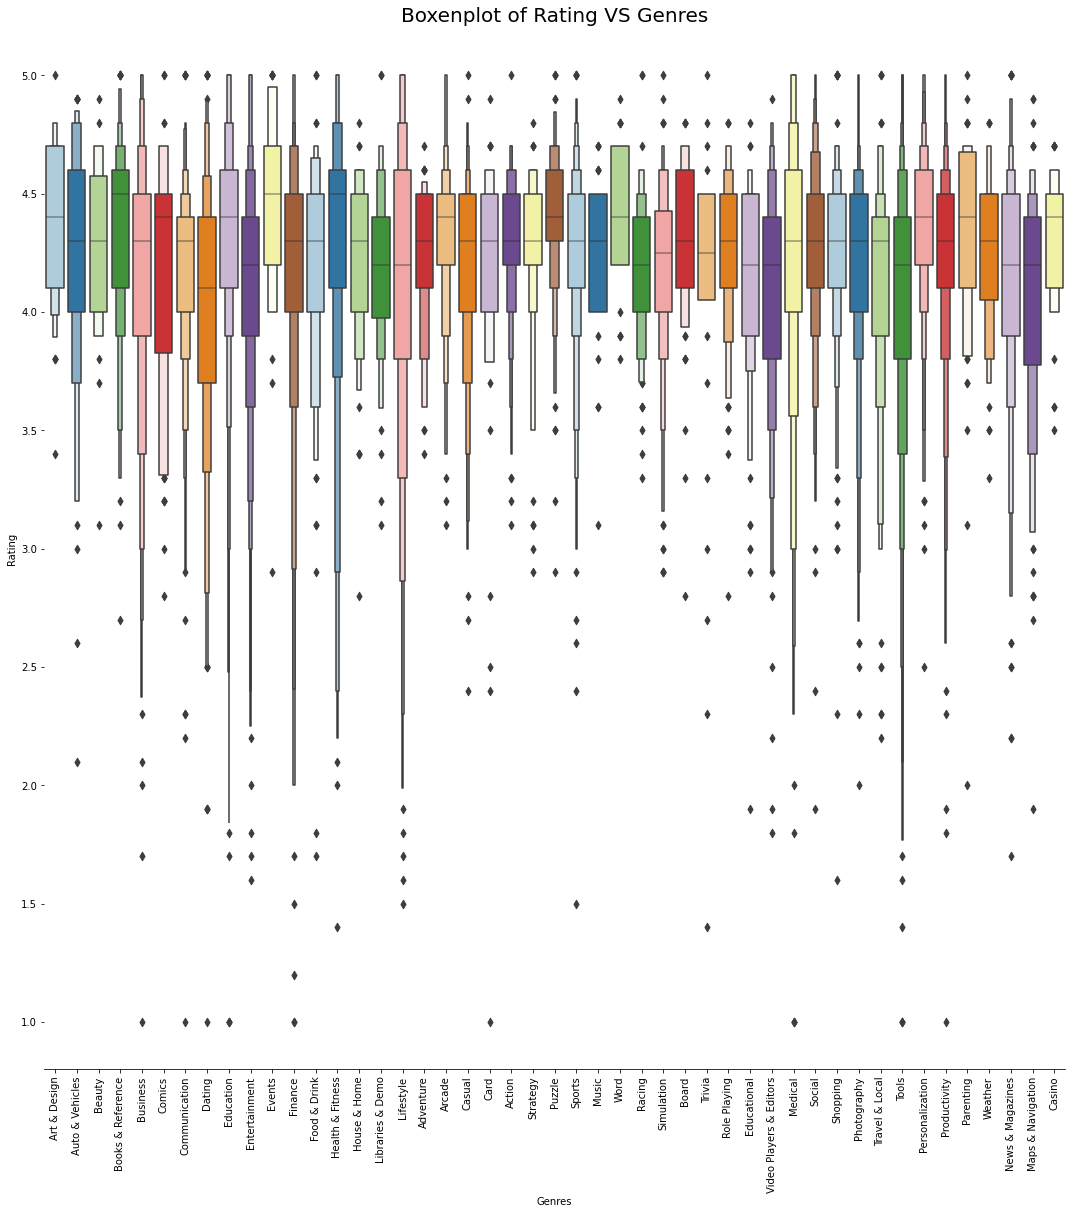

In [69]:
g = sns.catplot(x = 'Genres', y = 'Rating', data = df, kind = 'boxen', palette = 'Paired', height = 15)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size = 20)

### Discussion on Last Updates

In [70]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [71]:
df['Update on'] = pd.to_datetime(df['Last Updated'])
df['Update on'].describe()

count                    9359
unique                   1298
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Update on, dtype: object

In [72]:
df['Update on'].max()

Timestamp('2018-08-08 00:00:00')

In [73]:
(df['Update on'].min())

Timestamp('2010-05-21 00:00:00')

In [74]:
(df['Update on'].max())-(df['Update on'].min())

Timedelta('3001 days 00:00:00')

**We are having records starting from 21st May 2010 to 08th August 2018 i.e we are having records of 3001 Days**

In [75]:
df['lastupdate'] = (df['Update on'] -  df['Update on'].max()).dt.days
df['lastupdate'].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

Text(0.5, 1.0, 'Rating  VS Last Update( days ago )')

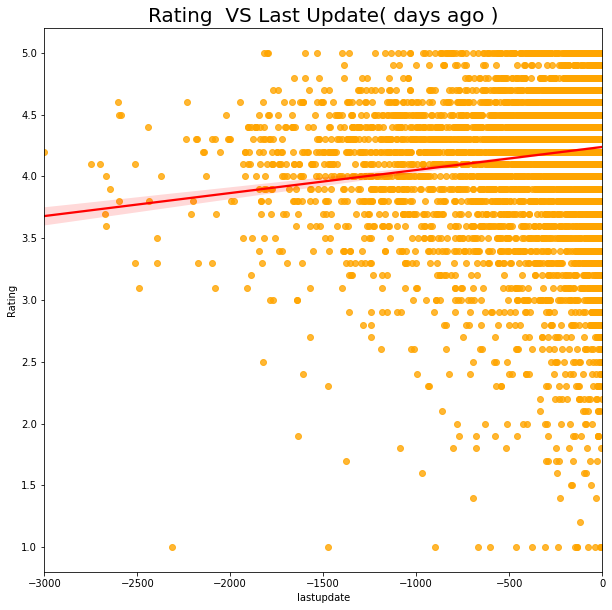

In [76]:
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", scatter_kws={'color': 'orange'}, line_kws ={'color': 'Red'},data=df );
plt.title('Rating  VS Last Update( days ago )',size = 20)

**We can clearly Observe that APPS which have been recently updates have received more ratings.**

**We have discussed 9 different parameters which can have their affect on Ratings for perticular app.**




## Completed !!!